In [31]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd

In [32]:
hours = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
passed = [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]

hours = np.reshape(hours, (len(hours), 1))
passed = np.reshape(passed, (len(passed), 1))

test_y = []
test_x = []

for i in range(200):
    test_y.append(np.sin(i/50) + np.random.normal()/200)
    test_x.append(i / 50)

# test_y = np.reshape(test_y, (len(test_y), 1))
# test_x = np.reshape(test_x, (len(test_x), 1))
test_y = passed
test_x = hours

In [33]:
def forward(x, w, b):
    return np.dot(x, w) + b

In [34]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [35]:
def d_sigmoid(Z):
    return sigmoid(Z) * (1 - sigmoid(Z))

In [36]:
def ReLU(Z):
    return np.maximum(0, Z)

In [37]:
def d_ReLU(Z):
    Z[Z <= 0] = 0
    Z[Z > 0] = 1
    return Z

In [38]:
def loss_function(y, y_pred):
    return np.sum((y - y_pred) ** 2)

In [39]:
def backward_propagation(y, X, Z1, Z2, Z3, w1, w2, w3, b1, b2, b3, a1, a2, a3,  learning_rate):

    delta_3 = -2 * (y - a3) * d_sigmoid(Z3)
    dw3 = np.dot(a2.T, delta_3)

    delta_2 = np.dot(delta_3, w3.T) * d_sigmoid(Z2)
    dw2 = np.dot(a1.T, delta_2)

    delta_1 = np.dot(delta_2, w2.T) * sigmoid(Z1)
    dw1 = np.dot(X.T, delta_1)

    db3 =  sum(delta_3)

    db2 = sum(delta_2)

    db1 = sum(delta_1)


    w1 -= dw1 * learning_rate
    w2 -= dw2 * learning_rate
    w3 -= dw3 * learning_rate
    b1 -= db1 * learning_rate
    b2 -= db2 * learning_rate
    b3 -= db3 * learning_rate
    return w1, w2, w3, b1, b2, b3

In [40]:
def train(y, x, iter, learning_rate):
    losses = []
    predictions = np.zeros((0, len(y)))
    w1 = np.random.normal(0, 1, size=(x.shape[1], number_of_nodes))
    w1 = np.reshape(w1, (x.shape[1], number_of_nodes))

    w2 = np.random.normal(0, 1, size=(number_of_nodes, number_of_nodes))
    w2 = np.reshape(w2, (number_of_nodes, number_of_nodes))

    w3 = np.random.normal(0, 1, size=number_of_nodes)
    w3 = np.reshape(w3, (number_of_nodes, 1))

    b1, b2, b3 = [0] * number_of_nodes, [0] * number_of_nodes, 0

    for i in range(iter):
        Z1 = forward(x, w1, b1)
        a1 = sigmoid(Z1)

        Z2 = forward(a1, w2, b2)
        a2 = sigmoid(Z2)

        Z3 = forward(a2, w3, b3)
        a3 = sigmoid(Z3)

        losses.append(loss_function(y, a3))
        predictions = np.append(predictions, a3.T, axis=0)

        w1, w2, w3, b1, b2, b3 = backward_propagation(y, x, Z1, Z2, Z3, w1, w2, w3, b1, b2, b3, a1, a2, a3, learning_rate)
    return losses, a3, w1, w2, w3, b1, b2, b3, predictions

np.random.seed(10)

number_of_nodes =  100

iterations = 10000
learning_rate = 0.005


sp, y_pred, w1, w2, w3, b1, b2, b3, pred = train(test_y, test_x, iterations, learning_rate)

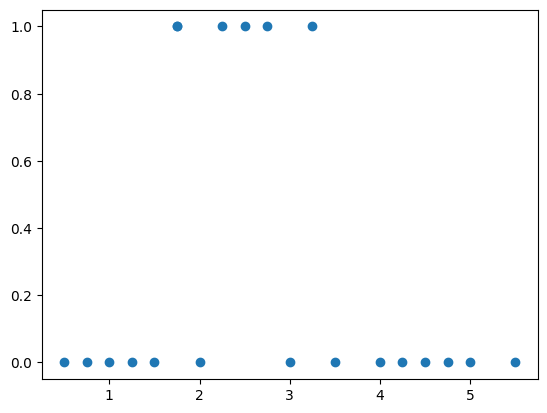

In [41]:
#plt.plot(test_x, y_pred, color="red")
plt.scatter(test_x, test_y)

In [42]:
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)

ax.set_xlim(( 0, 5))
ax.set_ylim((0, 1))

line, = ax.plot([], [], lw=2)
plt.close()

def update(num, x, pred):
    line.set_data(x, pred[num, :])
    return (line,)

anim = animation.FuncAnimation(fig, update, frames=1000, fargs=[test_x, pred],
                              interval=25, blit=True)

HTML(anim.to_html5_video())

In [43]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data[:100, :3])
y = pd.DataFrame(iris.target[:100])

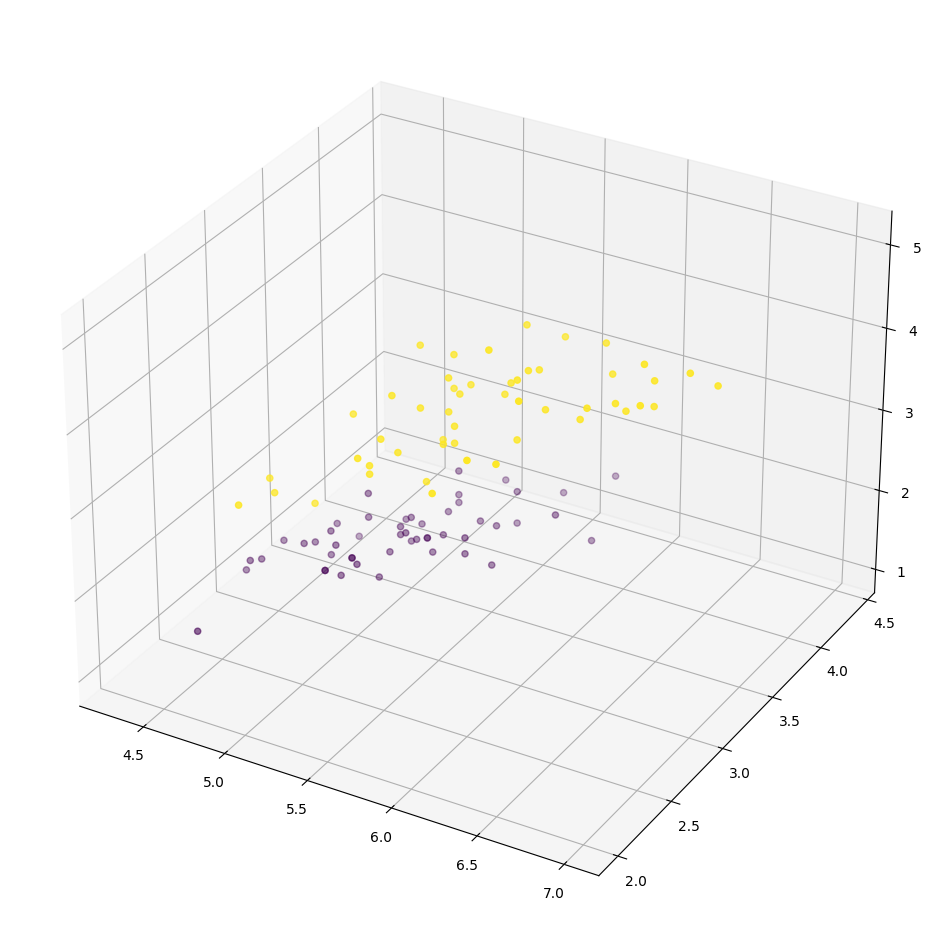

In [44]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(X.loc[:, 0], X.loc[:, 1], X.loc[:, 2], c=y)

/Users/jessekeranen/PycharmProjects/secondNeuralNetwork/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jessekeranen/PycharmProjects/secondNeuralNetwork/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


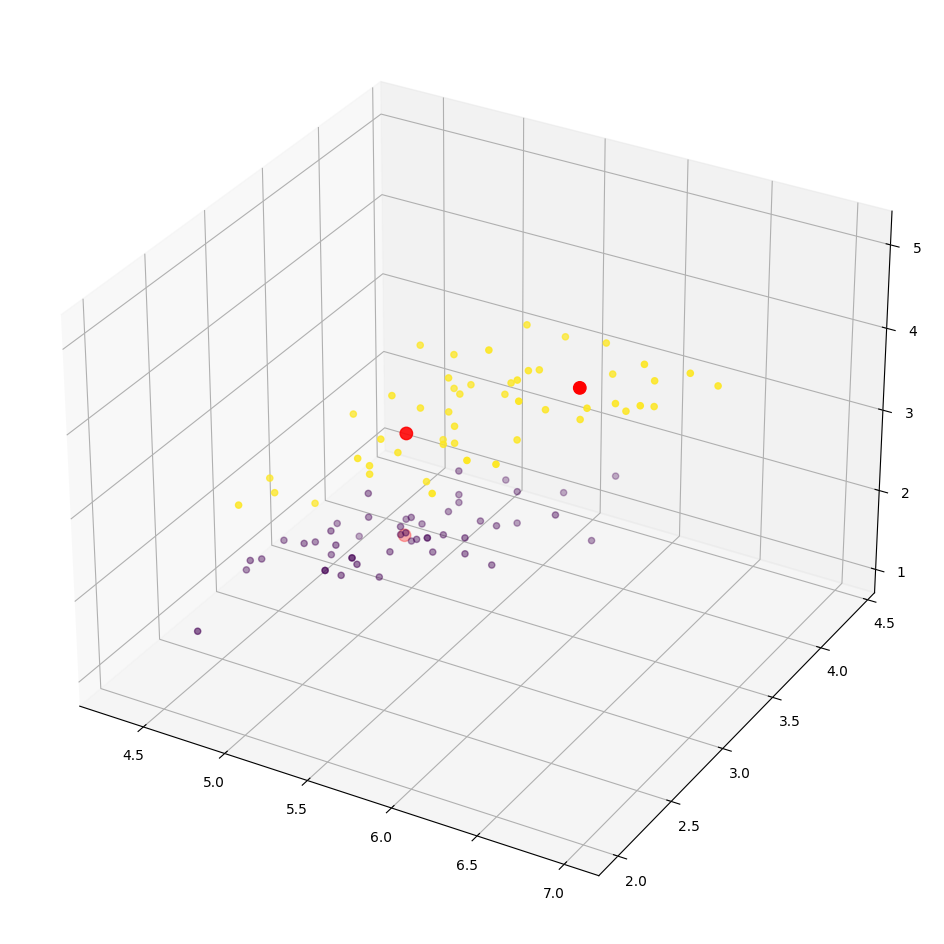

In [45]:
kmeans = KMeans(3)
kmeans.fit(X)

pred = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(X.loc[:, 0], X.loc[:, 1], X.loc[:, 2], c=y)
ax.scatter(centroids[:,0] , centroids[:,1], centroids[:, 2] , s = 80, color = 'r')

In [46]:
sp, y_pred, w1, w2, w3, b1, b2, b3, pred = train(y, X.loc[:, 0:1], iterations, learning_rate)

In [47]:
z = np.zeros((20, 20))

yy, xx = np.meshgrid(np.linspace(2, 4.5, 20), np.linspace(4, 7, 20))

for i in range(20):
    for j in range(20):
        input = [xx[i, j], yy[i, j]]

        Z1 = forward(input, w1, b1)
        a1 = sigmoid(Z1)

        Z2 = forward(a1, w2, b2)
        a2 = sigmoid(Z2)

        Z3 = forward(a2, w3, b3)
        a3 = sigmoid(Z3)

        z[i, j] = a3

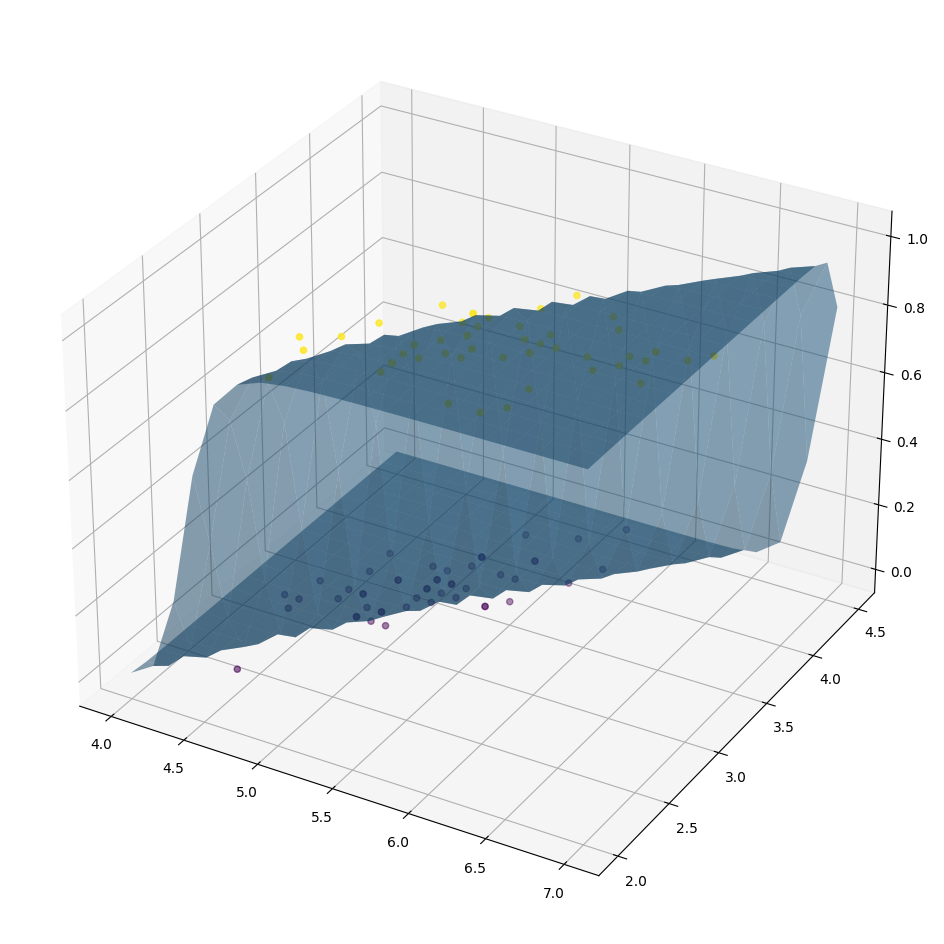

In [48]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(X.loc[:, 0], X.loc[:, 1], y, c=y)
#ax.scatter(centroids[:,0] , centroids[:,1], centroids[:, 2] , s = 80, color = 'r')
ax.plot_surface(xx, yy, z, alpha=0.5)

In [48]:
i = 0